<h1 align='center'>Two Samples: Tests on Two Means</h1> 

In [38]:
import numpy as np
import scipy.stats as stats
np.random.seed(42)  # Setting seed for reproducibility

# Sample data for Group A
sample_A = np.random.normal(loc=75, scale=10, size=30)
print('sample_A ',sample_A )
print()
# Sample data for Group B
sample_B = np.random.normal(loc=80, scale=12, size=30)
print('sample_B ',sample_B )



sample_A  [79.96714153 73.61735699 81.47688538 90.23029856 72.65846625 72.65863043
 90.79212816 82.67434729 70.30525614 80.42560044 70.36582307 70.34270246
 77.41962272 55.86719755 57.75082167 69.37712471 64.8716888  78.14247333
 65.91975924 60.87696299 89.65648769 72.742237   75.67528205 60.75251814
 69.55617275 76.1092259  63.49006423 78.75698018 68.9936131  72.0830625 ]

sample_B  [ 72.77952065 102.22733821  79.8380333   67.30746885  89.87053895
  65.3498762   82.50636314  56.48395851  64.06176741  82.36233483
  88.86159896  82.05641937  78.61222061  76.38675565  62.25773612
  71.3618695   74.47233475  92.68546671  84.12341947  58.84351814
  83.88900763  75.37901264  71.876936    87.34011547  92.37199427
  91.17536143  69.92938972  76.28945149  83.97516118  91.70654153]


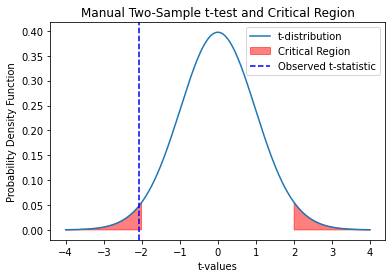

Manual Calculation:
T-statistic: -2.0720243559501355
Degrees of Freedom: 58
Critical t-value: 2.0017174830120923
Reject the null hypothesis. There is evidence of a significant difference in mean scores between the two groups.


In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)  # Setting seed for reproducibility

# Sample data for Group A
sample_A = np.random.normal(loc=75, scale=10, size=30)

# Sample data for Group B
sample_B = np.random.normal(loc=80, scale=12, size=30)

# Calculate means and standard deviations for each group
mean_A = np.mean(sample_A)
mean_B = np.mean(sample_B)

std_dev_A = np.std(sample_A, ddof=1)  # Use ddof=1 for sample standard deviation
std_dev_B = np.std(sample_B, ddof=1)

# Calculate the pooled standard deviation
pooled_std_dev = np.sqrt(((len(sample_A) - 1) * std_dev_A**2 + (len(sample_B) - 1) * std_dev_B**2) / (len(sample_A) + len(sample_B) - 2))

# Calculate the t-statistic
t_statistic = (mean_A - mean_B) / (pooled_std_dev * np.sqrt(1/len(sample_A) + 1/len(sample_B)))

# Degrees of freedom
df = len(sample_A) + len(sample_B) - 2

# Critical t-value for a two-tailed test
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

# Generate t-values for the plot
t_values = np.linspace(-4, 4, 1000)
pdf_values = stats.t.pdf(t_values, df)

# Plot the t-distribution
plt.plot(t_values, pdf_values, label='t-distribution')

# Highlight the critical region
plt.fill_between(t_values, pdf_values, where=(t_values < -t_critical) | (t_values > t_critical), color='red', alpha=0.5, label='Critical Region')

# Highlight the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed t-statistic')

# Add labels and legend
plt.title('Manual Two-Sample t-test and Critical Region')
plt.xlabel('t-values')
plt.ylabel('Probability Density Function')
plt.legend()

# Show the plot
plt.show()

# Print the results and decision
print("Manual Calculation:")
print(f"T-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"Critical t-value: {t_critical}")

# Decision based on the comparison
if np.abs(t_statistic) > t_critical:
    print("Reject the null hypothesis. There is evidence of a significant difference in mean scores between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence of a significant difference in mean scores between the two groups.")


In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)  # Setting seed for reproducibility

# Sample data for Group A
sample_A = np.random.normal(loc=75, scale=10, size=30)

# Sample data for Group B
sample_B = np.random.normal(loc=80, scale=12, size=30)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample_A, sample_B)

# Print the results and decision
print("\nLibrary Method:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant difference in mean scores between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence of a significant difference in mean scores between the two groups.")




Library Method:
T-statistic: -2.0720243559501355
P-value: 0.04271922499809656
Reject the null hypothesis. There is evidence of a significant difference in mean scores between the two groups.


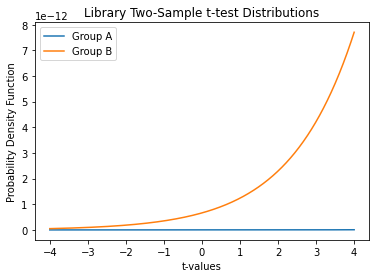

In [12]:
# Generate t-values for the plot
t_values = np.linspace(-4, 4, 1000)
pdf_values_A = stats.norm.pdf(t_values, loc=np.mean(sample_A), scale=np.std(sample_A, ddof=1))
pdf_values_B = stats.norm.pdf(t_values, loc=np.mean(sample_B), scale=np.std(sample_B, ddof=1))

# Plot the normal distributions for each group
plt.plot(t_values, pdf_values_A, label='Group A')
plt.plot(t_values, pdf_values_B, label='Group B')

# Add labels and legend
plt.title('Library Two-Sample t-test Distributions')
plt.xlabel('t-values')
plt.ylabel('Probability Density Function')
plt.legend()

# Show the plot
plt.show()


**Example**
An experiment was performed to compare the
abrasive wear of two different laminated materials Twelve
pieces of material 1 were tested by exposing each piece to a
machine measuring wear Ten pieces of material 2 were similarly
tested In each case, the depth of wear was observed The
samples of material 1 gave an average ( wear of 85 units
with a sample standard deviation of 4 while the samples of
material 2 gave an average of 81 with a sample standard
deviation of 5 Can we conclude at the 0 05 level of significance
that the abrasive wear of material 1 exceeds that of material 2
by more than 2 units? Assume the populations to be
approximately normal with equal variances

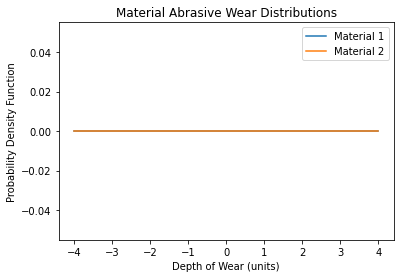

Results:
T-statistic: 1.0215078369104984
Degrees of Freedom: 20
Critical t-value: 2.0859634472658364
Fail to reject the null hypothesis. There is not enough evidence that the abrasive wear of Material 1 exceeds that of Material 2 by more than 2 units.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
mean_material1 = 85
std_dev_material1 = 4
sample_size_material1 = 12

mean_material2 = 81
std_dev_material2 = 5
sample_size_material2 = 10

alpha = 0.05

# Calculate the test statistic for a two-sample t-test
t_statistic = (mean_material1 - mean_material2 - 2) / np.sqrt((std_dev_material1**2 / sample_size_material1) + (std_dev_material2**2 / sample_size_material2))

# Degrees of freedom
df = sample_size_material1 + sample_size_material2 - 2

# Critical t-value for a two-tailed test
t_critical = stats.t.ppf(1 - alpha/2, df)

# Visualization
t_values = np.linspace(-4, 4, 1000)
pdf_material1 = stats.norm.pdf(t_values, mean_material1, std_dev_material1 / np.sqrt(sample_size_material1))
pdf_material2 = stats.norm.pdf(t_values, mean_material2, std_dev_material2 / np.sqrt(sample_size_material2))

plt.plot(t_values, pdf_material1, label='Material 1')
plt.plot(t_values, pdf_material2, label='Material 2')

plt.title('Material Abrasive Wear Distributions')
plt.xlabel('Depth of Wear (units)')
plt.ylabel('Probability Density Function')
plt.legend()

plt.show()

# Print the results and decision
print("Results:")
print(f"T-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"Critical t-value: {t_critical}")

# Decision based on the comparison
if np.abs(t_statistic) > t_critical:
    print("Reject the null hypothesis. There is evidence that the abrasive wear of Material 1 exceeds that of Material 2 by more than 2 units.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence that the abrasive wear of Material 1 exceeds that of Material 2 by more than 2 units.")


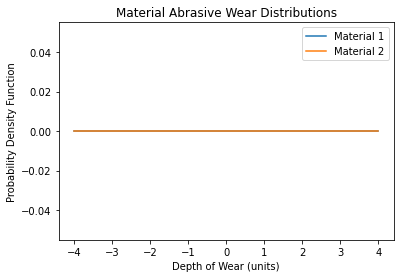

Results:
T-statistic: 5.01493521528516
P-value: 6.641148113434094e-05
Reject the null hypothesis. There is evidence that the abrasive wear of Material 1 exceeds that of Material 2 by more than 2 units.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
mean_material1 = 85
std_dev_material1 = 4
sample_size_material1 = 12

mean_material2 = 81
std_dev_material2 = 5
sample_size_material2 = 10

alpha = 0.05

# Perform a two-sample t-test using SciPy
t_statistic, p_value = stats.ttest_ind(np.random.normal(mean_material1, std_dev_material1, sample_size_material1),
                                       np.random.normal(mean_material2, std_dev_material2, sample_size_material2))

# Visualization
t_values = np.linspace(-4, 4, 1000)
pdf_material1 = stats.norm.pdf(t_values, mean_material1, std_dev_material1 / np.sqrt(sample_size_material1))
pdf_material2 = stats.norm.pdf(t_values, mean_material2, std_dev_material2 / np.sqrt(sample_size_material2))

plt.plot(t_values, pdf_material1, label='Material 1')
plt.plot(t_values, pdf_material2, label='Material 2')

plt.title('Material Abrasive Wear Distributions')
plt.xlabel('Depth of Wear (units)')
plt.ylabel('Probability Density Function')
plt.legend()

plt.show()

# Print the results and decision
print("Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the abrasive wear of Material 1 exceeds that of Material 2 by more than 2 units.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence that the abrasive wear of Material 1 exceeds that of Material 2 by more than 2 units.")



**Example**
A builder claims that heat pumps are
installed in 70 of all homes being constructed today in
the city of Richmond, Virginia Would you agree with
this claim if a random survey of new homes in this city
showed that 8 out of 15 had heat pumps installed? Use
a 0 10 level of significance
Dr.

In [18]:
import numpy as np
from scipy import stats

# Given data
p_claimed = 0.70  # Claimed proportion by the builder
sample_proportion = 8 / 15  # Proportion from the random survey
sample_size = 15  # Size of the random survey

alpha = 0.10  # Level of significance

# Calculate the test statistic for a two-tailed test
z_statistic = (sample_proportion - p_claimed) / np.sqrt((p_claimed * (1 - p_claimed)) / sample_size)

# Critical z-values for a two-tailed test
z_critical_lower = stats.norm.ppf(alpha/2)
z_critical_upper = -z_critical_lower

# Print the hypotheses
print(f"Null Hypothesis (H0): p = {p_claimed} (The true proportion of homes with heat pumps installed is 70%).")
print(f"Alternative Hypothesis (H1): p ≠ {p_claimed} (The true proportion of homes with heat pumps installed is not equal to 70%.)\n")

# Print the results and decision
print(f"Sample Proportion: {sample_proportion}")
print(f"Sample Size: {sample_size}")
print(f"Level of Significance: {alpha}")
print(f"Test Statistic: {z_statistic}")
print(f"Critical z-values: {z_critical_lower} and {z_critical_upper}")

# Decision based on the comparison
if z_statistic < z_critical_lower or z_statistic > z_critical_upper:
    print("\nReject the null hypothesis. There is evidence to suggest that the true proportion of homes with heat pumps installed is not equal to 70%.")
else:
    print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of homes with heat pumps installed is not equal to 70%.")


Null Hypothesis (H0): p = 0.7 (The true proportion of homes with heat pumps installed is 70%).
Alternative Hypothesis (H1): p ≠ 0.7 (The true proportion of homes with heat pumps installed is not equal to 70%.)

Sample Proportion: 0.5333333333333333
Sample Size: 15
Level of Significance: 0.1
Test Statistic: -1.4085904245475274
Critical z-values: -1.6448536269514729 and 1.6448536269514729

Fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of homes with heat pumps installed is not equal to 70%.


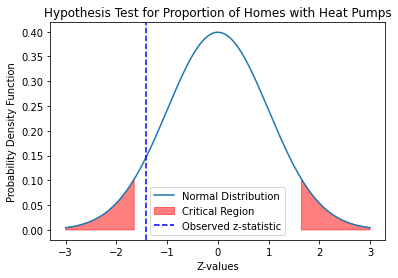

In [19]:


# Generate values for the plot
z_values = np.linspace(-3, 3, 1000)
pdf_values = stats.norm.pdf(z_values, 0, 1)

# Plot the normal distribution
plt.plot(z_values, pdf_values, label='Normal Distribution')

# Highlight the critical regions
plt.fill_between(z_values, pdf_values, where=(z_values < z_critical_lower) | (z_values > z_critical_upper), color='red', alpha=0.5, label='Critical Region')

# Highlight the observed z-statistic
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed z-statistic')

# Add labels and legend
plt.title('Hypothesis Test for Proportion of Homes with Heat Pumps')
plt.xlabel('Z-values')
plt.ylabel('Probability Density Function')
plt.legend()

# Show the plot
plt.show()

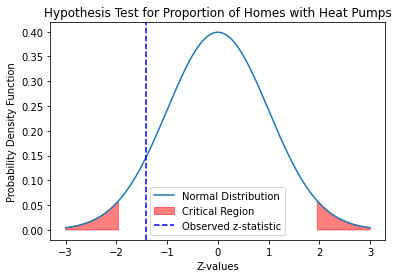

Results:
Z-statistic: -1.4085904245475274
P-value: 0.1589563118794035

Fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of homes with heat pumps installed is not equal to 70%.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
p_claimed = 0.70  # Claimed proportion by the builder
sample_proportion = 8 / 15  # Proportion from the random survey
sample_size = 15  # Size of the random survey

alpha = 0.10  # Level of significance

# Calculate the standard error of the proportion
standard_error = np.sqrt((p_claimed * (1 - p_claimed)) / sample_size)

# Calculate the z-statistic
z_statistic = (sample_proportion - p_claimed) / standard_error

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

# Visualization
z_values = np.linspace(-3, 3, 1000)
pdf_values = stats.norm.pdf(z_values, 0, 1)

plt.plot(z_values, pdf_values, label='Normal Distribution')
plt.fill_between(z_values, pdf_values, where=(z_values < -1.96) | (z_values > 1.96), color='red', alpha=0.5, label='Critical Region')
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed z-statistic')

plt.title('Hypothesis Test for Proportion of Homes with Heat Pumps')
plt.xlabel('Z-values')
plt.ylabel('Probability Density Function')
plt.legend()

plt.show()

# Print the results and decision
print("Results:")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Decision based on the p-value
if p_value < alpha:
    print("\nReject the null hypothesis. There is evidence to suggest that the true proportion of homes with heat pumps installed is not equal to 70%.")
else:
    print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of homes with heat pumps installed is not equal to 70%.")


> **Example** A commonly prescribed drug for relieving
nervous tension is believed to be only 60 effective
Experimental results with a new drug administered to a
random sample of 100 adults who were suffering from
nervous tension show that 70 received relief Is this
sufficient evidence to conclude that the new drug is
superior to the one commonly prescribed Use a 0 05
level of significance

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

p_common = 0.60
sample_size = 100
sample_proportion_new = 70 / sample_size
alpha = 0.05

z_statistic = (sample_proportion_new - p_common) / np.sqrt((p_common * (1 - p_common)) / sample_size)
z_critical = stats.norm.ppf(1 - alpha)


print("Results:")
print(f"Sample Proportion for New Drug: {sample_proportion_new}")
print(f"Common Proportion: {p_common}")
print(f"Sample Size: {sample_size}")
print(f"Level of Significance: {alpha}")
print(f"Test Statistic: {z_statistic}")
print(f"Critical z-value: {z_critical}")

if z_statistic > z_critical:
    print("\nReject the null hypothesis. There is evidence to suggest that the new drug is superior to the commonly prescribed drug.")
else:
    print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the new drug is superior to the commonly prescribed drug.")


Results:
Sample Proportion for New Drug: 0.7
Common Proportion: 0.6
Sample Size: 100
Level of Significance: 0.05
Test Statistic: 2.0412414523193148
Critical z-value: 1.6448536269514722

Reject the null hypothesis. There is evidence to suggest that the new drug is superior to the commonly prescribed drug.


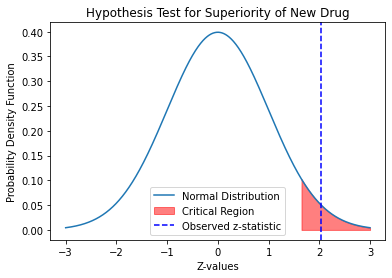

In [29]:

plt.plot(np.linspace(-3, 3, 1000), stats.norm.pdf(np.linspace(-3, 3, 1000), 0, 1), label='Normal Distribution')
plt.fill_between(np.linspace(-3, 3, 1000), stats.norm.pdf(np.linspace(-3, 3, 1000), 0, 1),
                 where=(np.linspace(-3, 3, 1000) > z_critical), color='red', alpha=0.5, label='Critical Region')
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed z-statistic')

plt.title('Hypothesis Test for Superiority of New Drug')
plt.xlabel('Z-values')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

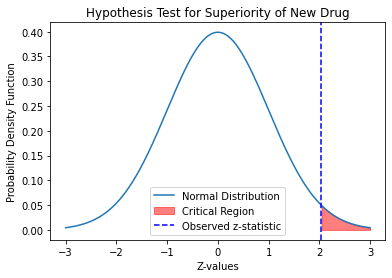

Results:
Sample Proportion for New Drug: 0.7
Common Proportion: 0.6
Sample Size: 100
Level of Significance: 0.05
Test Statistic: 2.0412414523193148
P-value: 0.020613416668581852

Reject the null hypothesis. There is evidence to suggest that the new drug is superior to the commonly prescribed drug.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
p_common = 0.60
sample_size = 100
sample_proportion_new = 70 / sample_size
alpha = 0.05

# Calculate the standard error of the proportion
standard_error = np.sqrt((p_common * (1 - p_common)) / sample_size)

# Calculate the z-statistic
z_statistic = (sample_proportion_new - p_common) / standard_error

# Calculate the one-tailed p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Visualization
plt.plot(np.linspace(-3, 3, 1000), stats.norm.pdf(np.linspace(-3, 3, 1000), 0, 1), label='Normal Distribution')
plt.fill_between(np.linspace(-3, 3, 1000), stats.norm.pdf(np.linspace(-3, 3, 1000), 0, 1),
                 where=(np.linspace(-3, 3, 1000) > z_statistic), color='red', alpha=0.5, label='Critical Region')
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed z-statistic')

plt.title('Hypothesis Test for Superiority of New Drug')
plt.xlabel('Z-values')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

# Print the results and decision
print("Results:")
print(f"Sample Proportion for New Drug: {sample_proportion_new}")
print(f"Common Proportion: {p_common}")
print(f"Sample Size: {sample_size}")
print(f"Level of Significance: {alpha}")
print(f"Test Statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Decision based on the p-value
if p_value < alpha:
    print("\nReject the null hypothesis. There is evidence to suggest that the new drug is superior to the commonly prescribed drug.")
else:
    print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the new drug is superior to the commonly prescribed drug.")


<h1  align='center'>Two Samples: Tests on Two 
Proportions</h1>

> **Example**
A vote is to be taken among the residents of a
town and the surrounding county to determine
whether a proposed chemical plant should be
constructed The construction site is within the town
limits, and for this reason many voters in the county
believe that the proposal will pass because of the large
proportion of town voters who favor the construction
To determine if there is a significant difference in the
proportions of town voters and county voters favoring
the proposal, a poll is taken If 120 of 200 town voters
favor the proposal and 240 of 500 county residents
favor it, would you agree that the proportion of town
voters favoring the proposal is higher than the
proportion of county voters Use an α 0 05 level of
significance

Sample Proportion Town: 0.6
Sample Proportion County: 0.48
Z-statistic: 2.869720215917757
Critical z-value: 1.6448536269514722
Reject the null hypothesis. There is evidence that the proportion of town voters favoring the proposal is higher than the proportion of county voters.


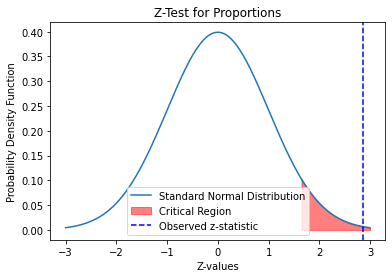

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
n_town = 200
n_county = 500
x_town = 120
x_county = 240

# Sample proportions
p_town = x_town / n_town
p_county = x_county / n_county

# Pooled sample proportion
pooled_p = (x_town + x_county) / (n_town + n_county)

# Calculate standard error
standard_error = np.sqrt(pooled_p * (1 - pooled_p) * ((1 / n_town) + (1 / n_county)))

# Calculate z-statistic
z_statistic = (p_town - p_county) / standard_error

# Critical z-value for a one-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)


# Print results
print(f"Sample Proportion Town: {p_town}")
print(f"Sample Proportion County: {p_county}")
print(f"Z-statistic: {z_statistic}")
print(f"Critical z-value: {z_critical}")
if z_statistic > z_critical:
    print("Reject the null hypothesis. There is evidence that the proportion of town voters favoring the proposal is higher than the proportion of county voters.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence that the proportion of town voters favoring the proposal is higher than the proportion of county voters.")




# Visualization
x_values = np.linspace(-3, 3, 1000)
y_values = stats.norm.pdf(x_values, 0, 1)

plt.plot(x_values, y_values, label='Standard Normal Distribution')
plt.fill_between(x_values, y_values, where=(x_values > z_critical), color='red', alpha=0.5, label='Critical Region')
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed z-statistic')

plt.title('Z-Test for Proportions')
plt.xlabel('Z-values')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()


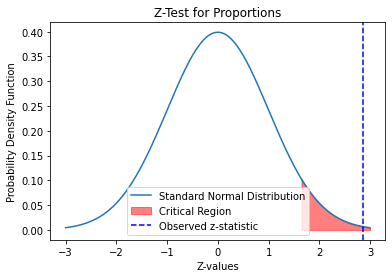

Results:
Sample Proportion Town: 0.6
Sample Proportion County: 0.48
Z-statistic: 2.869720215917757
P-value: 0.0020541757121497117
Reject the null hypothesis. There is evidence that the proportion of town voters favoring the proposal is higher than the proportion of county voters.


In [36]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Given data
n_town = 200
n_county = 500
x_town = 120
x_county = 240

# Sample proportions
p_town = x_town / n_town
p_county = x_county / n_county

# Perform two-sample Z-test for proportions
z_statistic, p_value = sm.stats.proportions_ztest([x_town, x_county], [n_town, n_county], alternative='larger')

# Critical z-value for a one-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)

# Visualization
x_values = np.linspace(-3, 3, 1000)
y_values = stats.norm.pdf(x_values, 0, 1)

plt.plot(x_values, y_values, label='Standard Normal Distribution')
plt.fill_between(x_values, y_values, where=(x_values > z_critical), color='red', alpha=0.5, label='Critical Region')
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed z-statistic')

plt.title('Z-Test for Proportions')
plt.xlabel('Z-values')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

# Print results
print("Results:")
print(f"Sample Proportion Town: {p_town}")
print(f"Sample Proportion County: {p_county}")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Decision based on the comparison
if z_statistic > z_critical:
    print("Reject the null hypothesis. There is evidence that the proportion of town voters favoring the proposal is higher than the proportion of county voters.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence that the proportion of town voters favoring the proposal is higher than the proportion of county voters.")
